# Differential amplifier

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
# ============================================================
# Import Required Libraries
# ============================================================

# ------------------------------------------------------------
# Numerical and Plotting Libraries
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ------------------------------------------------------------
# PySpice Core Classes
# ------------------------------------------------------------
from PySpice.Spice.Netlist import Circuit, SubCircuitFactory
from PySpice.Unit import *

# ============================================================
# End of Imports
# ============================================================

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Circuit

The **differential amplifier** is illustrated in [](#Opamp-differential_eu).
It consists of **four resistors** and **two input voltages**, denoted as $V_1$ and $V_2$.
Each input is connected through a resistor — $R_1$ for the first input and $R_2$ for the second.

Additionally, a resistor **$R_g$** is connected between the **non-inverting input (+)** and **ground**, while another resistor is connected between the **inverting input (–)** and the **output** of the op-amp.

```{figure} ./images/Opamp-differential_eu.svg
:name: Opamp-differential_eu
:align: center
:width: 500px

Differential (subtractor) amplifier
```

The primary function of this circuit is to **subtract** one signal from another — effectively producing an output proportional to the **difference between the two input voltages**.

## Equation

The general equation for this differential amplifier circuit is given by:

$$
V_S = V_2 \cdot \frac{(R_f + R_1)R_g}{(R_g + R_2)R_1} - V_1 \cdot \frac{R_f}{R_1}
$$

If the resistor ratios satisfy the condition

$$
\frac{R_f}{R_1} = \frac{R_g}{R_2}
$$

then the expression simplifies to:

$$
V_S = \frac{R_f}{R_1}(V_2 - V_1)
$$

Finally, if we choose $R_1 = R_f$ and $R_2 = R_g$, the amplifier behaves as a **pure subtractor**, giving:

$$
V_S = V_2 - V_1
$$

## Demonstration

The goal of this section is to understand **how the previous equation is derived**.
We start from the schematic shown in [](#Opamp-differential_eu_demonstration).

```{figure} ./images/Opamp-differential_eu-demonstration.svg
:name: Opamp-differential_eu_demonstration
:align: center
:width: 500px

Differential (subtractor) amplifier — demonstration diagram
```

## Step-by-Step Derivation

* The voltage at the **non-inverting input** ($V^+$) is obtained from a **voltage divider**, as shown in [](#Opamp-differential_eu_demonstration):

$$
V^+ = \frac{R_g}{R_2 + R_g} \cdot V_2
$$

* The voltage at the **inverting input** ($V^-$) can be derived from the left-hand side of the circuit.
  There are two loops to consider.

### First loop

$$
V_1 = V_{R_1} + V^- \
V_1 = R_1 \cdot i + V^-
$$

### Second loop

$$
V^- = V_S + V_{R_f} \
V^- = V_S + R_f \cdot i
$$

Since the same current $i$ flows through both resistors $R_1$ and $R_f$, we can combine these two loop equations:

$$
\begin{cases}
V_1 = R_1 \cdot i + V^- \\
V^- = V_S + R_f \cdot i
\end{cases}
$$

### Isolating the Current

From the first equation:

$$
V_1 - V^- = R_1 \cdot i \\
i = \frac{V_1 - V^-}{R_1}
$$

### Substituting into the Second Equation

$$
V^- = V_S + R_f \cdot i \\
V^- = V_S + R_f \cdot \frac{V_1 - V^-}{R_1}
$$

Expanding and rearranging:

$$
V^- = V_S + V_1 \frac{R_f}{R_1} - V^- \frac{R_f}{R_1}
$$

$$
V^- + V^- \frac{R_f}{R_1} = V_S + V_1 \frac{R_f}{R_1}
$$

$$
V^- \left(1 + \frac{R_f}{R_1}\right) = V_S + V_1 \frac{R_f}{R_1}
$$

$$
V^- = \frac{V_S \cdot R_1 + V_1 \cdot R_f}{R_1 + R_f}
$$

### Equating the Inputs

Since an ideal operational amplifier maintains **zero differential voltage** ($\epsilon = 0$), we have:

$$
V^+ = V^-
$$

Substituting both expressions for $V^+$ and $V^-$ allows us to isolate $V_S$ and express it as a function of $V_1$ and $V_2$ — that is, derive the relationship:

$$
V_S = f(V_1, V_2)
$$

$$V^+ = V^-$$
$$\frac{R_g}{R_2 + R_g} \cdot V_2 = \frac{V_S \cdot R_1 + V_1 \cdot R_f}{R_1 + R_f}$$
$$\frac{R_1 + R_f}{R_2 + R_g} R_2 \cdot V_2 = V_S \cdot R_1 + V_1 \cdot R_f$$
$$\frac{R_1 + R_f}{R_2 + R_g} R_2 \cdot V_2 - V_1 \cdot R_f = V_S \cdot R_1$$
$$V_S = \frac{R_1 + R_f}{R_2 + R_g} \frac{R_2}{R_1} \cdot V_2 - V_1 \cdot \frac{R_f}{R_1}$$

Donc nous retrouvons bien la première équation.

## Circuit

The objective of this section is to **build the circuit in PySpice** in order to reproduce the differential amplification behavior.
To do this, we will follow the schematic shown in [](#Opamp-differential_eu_montage_pyspice).

```{figure} ./images/Opamp-differential_eu_pyspace.svg
:name: Opamp-differential_eu_montage_pyspice
:align: center
:width: 500px

Differential (subtractor) amplifier — PySpice circuit setup
```


In [3]:
# ============================================================
# Differential Op-Amp Subcircuit Definition
# ============================================================

class AOP_Differential(SubCircuitFactory):
    """
    Differential Amplifier using a uA741 Operational Amplifier.
    
    Node Order:
        v1   - Non-inverting input signal (+)
        v2   - Inverting input signal (−)
        out  - Output
        VCC  - Positive supply
        VEE  - Negative supply

    Parameters:
        R1 : Input resistor from v1 to inverting input (default 10 kΩ)
        R2 : Input resistor from v2 to non-inverting input (default 10 kΩ)
        Rg : Ground reference resistor (default 10 kΩ)
        Rf : Feedback resistor (default 10 kΩ)
    """
    
    NAME  = 'AOP_Differential'
    NODES = ('v1', 'v2', 'out', 'VCC', 'VEE')

    def __init__(self, R1=10@u_kOhm, R2=10@u_kOhm, Rf=100@u_kOhm, Rg=100@u_kOhm):
        super().__init__()

        # ------------------------------------------------------------
        # Operational Amplifier Core (uA741 model)
        # ------------------------------------------------------------
        self.X('U1', 'UA741', 'v_plus', 'v_minus', 'VCC', 'VEE', 'out')

        # ------------------------------------------------------------
        # Resistor Network
        # ------------------------------------------------------------
        self.R('1', 'v1', 'v_minus', R1)     # Input resistor (v1 → −)
        self.R('2', 'v2', 'v_plus',  R2)     # Input resistor (v2 → +)
        self.R('g', 'v_plus', self.gnd, Rg)  # Ground reference resistor
        self.R('f', 'v_minus', 'out',  Rf)   # Feedback resistor
        
# ============================================================
# End of Subcircuit Definition
# ============================================================

## First Test

The objective of this notebook is not to analyze the limitations of the operational amplifier (op-amp), as this has already been covered in the previous three notebooks.
Instead, the focus here is on understanding how to use this type of amplifier in practical applications.

To begin, we will examine a simple case involving two signals where the goal is to eliminate or suppress one of them.

### Création des signaux

L'objectif est de créer les signaux avec numpy et ensuite d'insérer les signaux dans pyspace

In [4]:
# ============================================================
# Signal Definition and Sampling Parameters
# ============================================================

# ------------------------------------------------------------
# Sampling Setup
# ------------------------------------------------------------
fs = 1e3                        # Sampling frequency [Hz]
nb_data = 1000                  # Number of data points
t_end = nb_data / fs            # Simulation duration [s]
t = np.arange(0, t_end, 1/fs)   # Time vector

# ------------------------------------------------------------
# Triangular Signal Parameters
# ------------------------------------------------------------
f_tri = 10          # Frequency of triangular signal [Hz]
A_tri = 1e-3        # Peak amplitude of triangular signal [V]

# ------------------------------------------------------------
# Sine Wave Parameters
# ------------------------------------------------------------
f_sin = 5           # Frequency of sine wave [Hz]
A_sin = 1e-3        # Peak amplitude of sine wave [V]

# ============================================================
# End of Signal Definition
# ============================================================

In [5]:
# Signal triangle
v_tri = signal.sawtooth(2 * np.pi * f_tri * t, width=.5)
V_tri = A_tri * v_tri

# Signal sinusoidale
v_sin = np.sin(2 * np.pi * f_sin * t)
V_sin = A_sin * v_sin

# Somme
V_somm = V_tri + V_sin

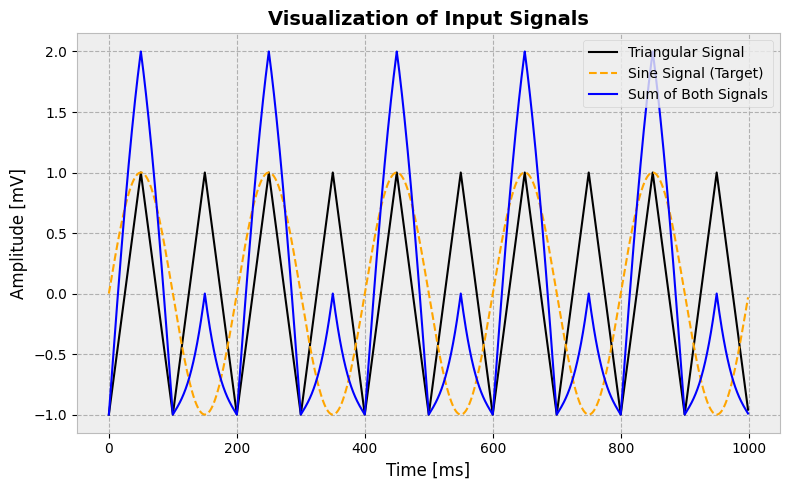

In [11]:
# ------------------------------------------------------------
# Signal Visualization
# ------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.title('Visualization of Input Signals', fontsize=14, weight='bold')

plt.plot(t * 1e3, V_tri * 1e3,  label='Triangular Signal',    color='black',  linewidth=1.5)
plt.plot(t * 1e3, V_sin * 1e3,  label='Sine Signal (Target)', color='orange', linewidth=1.5, linestyle='--',)
plt.plot(t * 1e3, V_somm * 1e3, label='Sum of Both Signals',  color='blue',   linewidth=1.5)

# ------------------------------------------------------------
# Graph Formatting
# ------------------------------------------------------------
plt.xlabel('Time [ms]', fontsize=12)
plt.ylabel('Amplitude [mV]', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# End of Signal Visualization
# ============================================================

The objective is to reconstruct the **orange signal (the sinusoidal wave)** from the **bleu signal**, which is the **sum of the black signal (triangular wave)** and the **black signal**.
To achieve this, we will **subtract the black signal** from the green one, thereby **isolating and recovering the orange signal**.

In [7]:
# Prepare PWL-compatible (time, voltage) data
signal_v1 = list(zip(t, V_somm))
signal_v2 = list(zip(t, V_tri))

In [12]:
# ============================================================
# Circuit Definition
# ============================================================
circuit = Circuit('Differential Op-Amp (Custom Input)')

# ------------------------------------------------------------
# Include the Operational Amplifier Model (uA741)
# ------------------------------------------------------------
circuit.include('lib/UA741.sub')   # Adjust path to your local UA741.sub

# ------------------------------------------------------------
# Power Supplies
# ------------------------------------------------------------
circuit.V('cc', '+VCC', circuit.gnd, 15@u_V)
circuit.V('ee', '-VCC', circuit.gnd, -15@u_V)

# ------------------------------------------------------------
# Input Sources from NumPy Arrays (PWL)
# ------------------------------------------------------------
circuit.PieceWiseLinearVoltageSource('1', 'v1', circuit.gnd, 
                                     values=signal_v1)
circuit.PieceWiseLinearVoltageSource('2', 'v2', circuit.gnd, 
                                     values=signal_v2)

# ------------------------------------------------------------
# Differential Amplifier Core
# ------------------------------------------------------------
circuit.subcircuit(AOP_Differential())
circuit.X('1', 'AOP_Differential', 'v1', 'v2', 'out', 'VCC', 'VEE')


# Load resistor
circuit.R('load', 'out', circuit.gnd, 10@u_kOhm);

# ============================================================
# End of Circuit Definition
# ============================================================

In [18]:
# ============================================================
# Transient Simulation Setup
# ============================================================

# ------------------------------------------------------------
# Initialize the Circuit Simulator
# ------------------------------------------------------------
# Operating temperature = 25°C
# Nominal temperature = 25°C
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# ------------------------------------------------------------
# Perform Transient Analysis
# ------------------------------------------------------------
# step_time : simulation time step (s)
# end_time  : total simulation duration (s)
analysis = simulator.transient(step_time=1/fs@u_s, end_time=t_end@u_s)

# ============================================================
# End of Transient Simulation Setup
# ============================================================

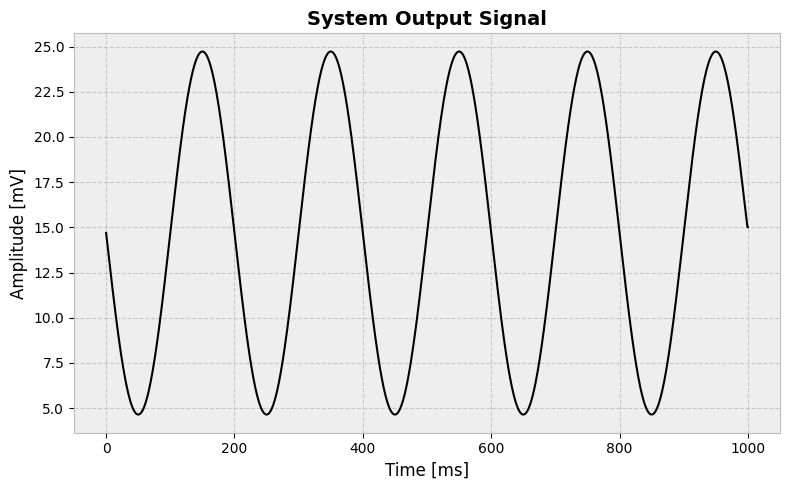

In [24]:
# ============================================================
# Plot Output Signal of the System
# ============================================================

plt.figure(figsize=(8, 5))
plt.plot(analysis.time * 1e3, analysis['out'] * 1e3, color='black', linewidth=1.5)
plt.title('System Output Signal', fontsize=14, weight='bold')
plt.xlabel('Time [ms]', fontsize=12)
plt.ylabel('Amplitude [mV]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ============================================================
# End of Output Signal Plot
# ============================================================

The output of the system successfully recovers the target signal. However, a few observations can be made:

* First, the recovered signal experiences a **180° phase shift**. While not critical in this context, it is worth noting.
* More importantly, the signal exhibits a **DC offset**.

The next objective will be to understand the origin of this offset and why it appears in the output.

There are still several aspects that remain to be explored.
For now, this notebook concludes at this stage, but in the future, the code and simulations should be further improved to gain a deeper understanding of the **differential operational amplifier** and its behavior.